## Подготовка данных

### Загрузка данных

In [32]:
# Подключим все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, KFold
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore") 

In [33]:
try:
    full = pd.read_csv("gold_recovery_full_new.csv", index_col='date', parse_dates=True)
    test = pd.read_csv("gold_recovery_test_new.csv", index_col='date', parse_dates=True)
    train = pd.read_csv("gold_recovery_train_new.csv", index_col='date', parse_dates=True)
except:
    full = pd.read_csv("/datasets/gold_recovery_full_new.csv", index_col='date', parse_dates=True)
    test = pd.read_csv("/datasets/gold_recovery_test_new.csv", index_col='date', parse_dates=True)
    train = pd.read_csv("/datasets/gold_recovery_train_new.csv", index_col='date', parse_dates=True)

In [34]:
display(train.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [35]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant                      14117 non-null float64
primary_c

In [36]:
display(test.head())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [37]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                    

In [38]:
display(full.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [39]:
print(full.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant                      19402 non-null float64
primary_c

### Проверка корректности рассчсета обогощения

In [40]:
C = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.output.concentrate_au']
F = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.input.feed_au']
T = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.output.tail_au']
rough_recov_calc = C * (F - T) / (F * (C - T)) * 100
rough_recov_train = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.output.recovery']

In [41]:
rough_recov_calc

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64

In [42]:
rough_recov_train

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [43]:
(rough_recov_calc-rough_recov_train).sum()

-9.983125437429408e-13

**Вывод**

Как можно видеть, разница между посчитанными и фактическими значениями очень маленькие. Значит поссчитанные значения корректны

### Признаки, недоступные в тестовой выборке

In [44]:
columns_test = []
for i in test.columns:
    columns_test.append(i)
print(columns_test)

['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_leve

In [45]:
columns_train = []
for i in train.columns:
    columns_train.append(i)
print(columns_train)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cle

In [46]:
not_test = list(set(columns_train)-set(columns_test))

for i in not_test:
    print(i)
    
print(len(not_test))

final.output.concentrate_pb
rougher.output.concentrate_sol
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_pb
primary_cleaner.output.concentrate_ag
final.output.tail_pb
rougher.output.tail_au
primary_cleaner.output.tail_au
rougher.output.recovery
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.tail_sol
rougher.output.tail_pb
final.output.concentrate_au
primary_cleaner.output.concentrate_au
final.output.tail_sol
final.output.recovery
primary_cleaner.output.tail_ag
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
final.output.concentrate_sol
secondary_cleaner.output.tail_sol
final.output.concentrate_ag
final.output.tail_ag
rougher.calculation.floatbank10_sulfate_to_au_feed
primary_cleaner.output.concentrate_pb
rougher.output.concentrate_pb
final.output.tail_au
secondary_cleaner.output.tail_au
primary_cleaner.output.tail_sol
rougher.output.tail_ag
rougher.out

**Вывод**

Обучающая выборка отличаается от тестовой выборки на 34 признака.

### Предобработка

In [47]:
au = train[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
pb = train[['final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb']]
ag = train[['final.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag']]
train_chart=train

In [51]:
train = train.fillna(method='ffill') 
test = test.fillna(method='ffill')

In [52]:
print('В обучающей выборке : {} строк {} признаков'.format(train.shape[0],train.shape[1]))
print('В тестовой выборке: {} строк {} признаков'.format(test.shape[0], test.shape[1]))

В обучающей выборке : 14149 строк 86 признаков
В тестовой выборке: 5290 строк 52 признаков


**Вывод**

В данном этапе мы "уравняли" наши выборки по признакам

## Анализ данных

### Распределение концентрации металлов в зависимости от этапа

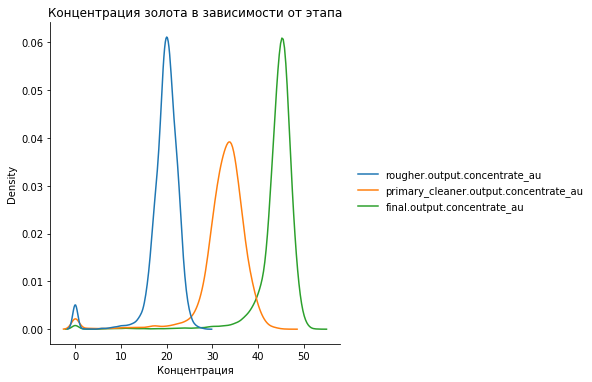

In [53]:
ax = sns.displot(data = au, kind = 'kde')
ax.set(title = 'Концентрация золота в зависимости от этапа', xlabel = 'Концентрация')
plt.show()

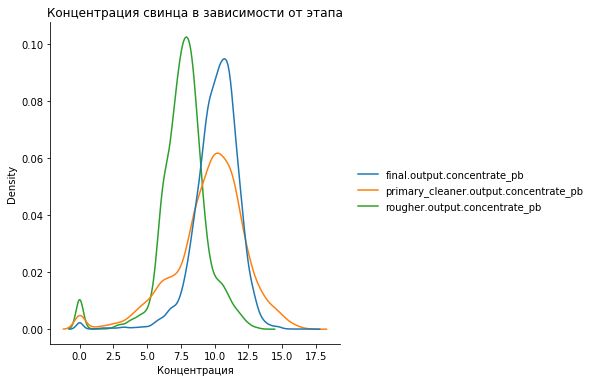

In [54]:
ax = sns.displot(data = pb, kind = 'kde')
ax.set(title = 'Концентрация свинца в зависимости от этапа', xlabel = 'Концентрация')
plt.show()

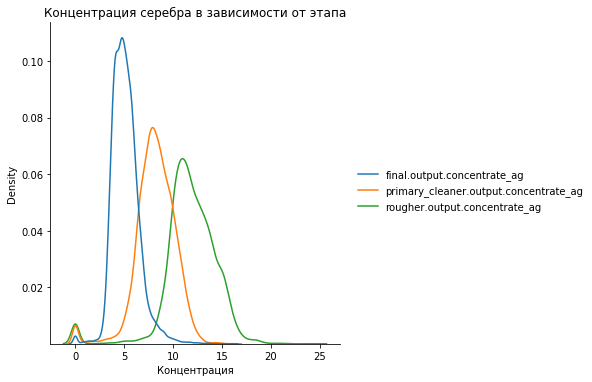

In [55]:
ax = sns.displot(data = ag, kind = 'kde')
ax.set(title = 'Концентрация серебра в зависимости от этапа', xlabel = 'Концентрация')
plt.show()

**Вывод**

Как и ожидалось, с каждым этапом очистки концентрация золота повышается

### Сравнение гранул сырья в тестовой и тренеровочной выборке

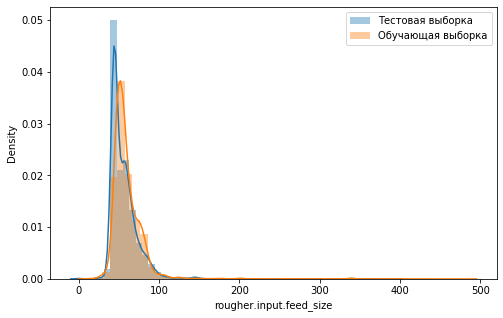

In [56]:
plt.figure(figsize=(8,5))
sns.distplot(test['rougher.input.feed_size'], label='Тестовая выборка')
sns.distplot(train['rougher.input.feed_size'], label='Обучающая выборка')
plt.legend()

**Вывод**

Визуально видно, что размеры гранул отличаются не существенно. 

### Суммарное содержание всех веществ

date
2016-01-15 00:00:00    14.871440
2016-01-15 01:00:00    14.905729
2016-01-15 02:00:00    14.638299
2016-01-15 03:00:00    14.199305
2016-01-15 04:00:00    13.511497
                         ...    
2018-08-18 06:59:59    16.045275
2018-08-18 07:59:59    15.104931
2018-08-18 08:59:59    14.515579
2018-08-18 09:59:59    14.313448
2018-08-18 10:59:59    14.399936
Length: 14149, dtype: float64
0


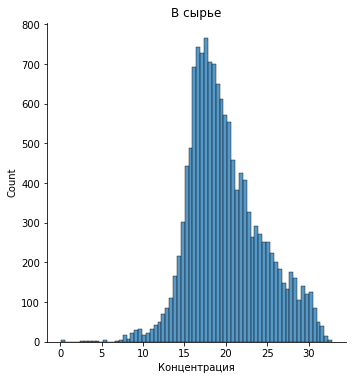

In [57]:
data_temp = train['rougher.input.feed_au']+train['rougher.input.feed_pb']+train['rougher.input.feed_ag']
print(data_temp)
print(data_temp.loc[data_temp == 0].count())
#data_temp = data_temp.query()
ax = sns.displot(data = data_temp)
ax.set(title = 'В сырье', xlabel = 'Концентрация')
plt.show()

date
2016-01-15 00:00:00    38.395653
2016-01-15 01:00:00    38.945647
2016-01-15 02:00:00    38.649756
2016-01-15 03:00:00    38.411473
2016-01-15 04:00:00    38.867359
                         ...    
2018-08-18 06:59:59    40.712449
2018-08-18 07:59:59    40.755632
2018-08-18 08:59:59    32.589863
2018-08-18 09:59:59    40.148948
2018-08-18 10:59:59    40.465768
Length: 14149, dtype: float64
297
0


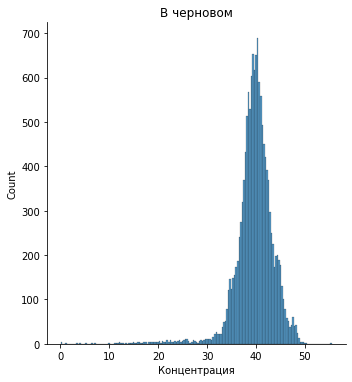

In [58]:
data_temp = train_chart['rougher.output.concentrate_au']+train_chart['rougher.output.concentrate_pb']+train_chart['rougher.output.concentrate_ag']
print(data_temp)
print(data_temp.loc[data_temp == 0].count())
data_temp = data_temp.loc[data_temp != 0]
print(data_temp.loc[data_temp == 0].count())

ax = sns.displot(data = data_temp)
ax.set(title = 'В черновом', xlabel = 'Концентрация')
plt.show()

date
2016-01-15 00:00:00    58.137072
2016-01-15 01:00:00    58.699942
2016-01-15 02:00:00    58.927421
2016-01-15 03:00:00    58.714815
2016-01-15 04:00:00    59.065251
                         ...    
2018-08-18 06:59:59    61.295107
2018-08-18 07:59:59    61.412113
2018-08-18 08:59:59    61.340054
2018-08-18 09:59:59    61.401016
2018-08-18 10:59:59    61.635645
Length: 14149, dtype: float64
58
0


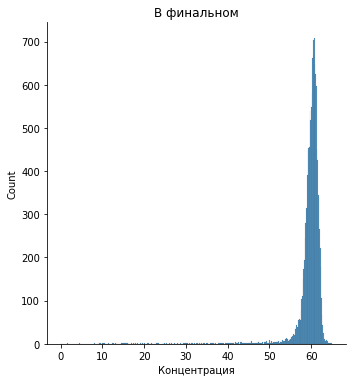

In [59]:
data_temp = train_chart['final.output.concentrate_au']+train_chart['final.output.concentrate_pb']+train_chart['final.output.concentrate_ag']
print(data_temp)
print(data_temp.loc[data_temp == 0].count())
data_temp = data_temp.loc[data_temp != 0]
print(data_temp.loc[data_temp == 0].count())

ax = sns.displot(data = data_temp)
ax.set(title = 'В финальном', xlabel = 'Концентрация')
plt.show()

**Вывод**

Мы показали, что общая концентрация с каждым этапом увеличивается

## Модель

In [60]:
def smape(y_target, y_pred):
    smape_1 = ((1/len(y_target)) * np.sum(2 * np.abs(y_target - y_pred) / (np.abs(y_target) + np.abs(y_pred)))) * 100
    return smape_1

In [61]:
RandomForestRegressor, LinearRegression

(sklearn.ensemble.forest.RandomForestRegressor,
 sklearn.linear_model.base.LinearRegression)

In [62]:
features = test.columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']

features_train = train[features].reset_index(drop=True)
target_train = train[targets].reset_index(drop=True)
features_test = test[features].reset_index(drop=True)
target_test = full[targets].loc[test.index].reset_index(drop=True)

In [63]:
#поделим наши данные на обучающую и тестовые выборки
feature_train_rougher = features_train
feature_test_rougher = features_test
target_train_rougher = target_train["rougher.output.recovery"]
target_test_rougher = target_test["rougher.output.recovery"]


feature_train_final = features_train
feature_test_final = features_test
target_train_final = target_train["final.output.recovery"]
target_test_final = target_test["final.output.recovery"]

In [64]:
target_test_final, target_test_rougher

(0       70.273583
 1       68.910432
 2       68.143213
 3       67.776393
 4       61.467078
           ...    
 5285    68.919891
 5286    68.440582
 5287    67.092759
 5288    68.061186
 5289    71.699976
 Name: final.output.recovery, Length: 5290, dtype: float64,
 0       89.993421
 1       88.089657
 2       88.412756
 3       87.360133
 4       83.236367
           ...    
 5285    95.172585
 5286    94.575036
 5287    93.018138
 5288    92.599042
 5289    91.177695
 Name: rougher.output.recovery, Length: 5290, dtype: float64)

In [65]:
feature_test_final.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [66]:
print("Размер обучающей выборки_rougher", feature_train_rougher.shape)
print("Размер тестовой выборки_rougher", feature_test_rougher.shape)
print("Размер обучающей выборки_rougher", target_train_rougher.shape)
print("Размер тестовой выборки_rougher", target_test_rougher.shape)

Размер обучающей выборки_rougher (14149, 52)
Размер тестовой выборки_rougher (5290, 52)
Размер обучающей выборки_rougher (14149,)
Размер тестовой выборки_rougher (5290,)


In [67]:
print("Размер обучающей выборки_final", feature_train_final.shape)
print("Размер тестовой выборки_final", feature_test_final.shape)
print("Размер обучающей выборки_final", target_train_final.shape)
print("Размер тестовой выборки_final", target_test_final.shape)

Размер обучающей выборки_final (14149, 52)
Размер тестовой выборки_final (5290, 52)
Размер обучающей выборки_final (14149,)
Размер тестовой выборки_final (5290,)


In [68]:
#найдем наилучшие значения для случайного леса
model_forest = RandomForestRegressor(random_state=12345)

In [69]:
tree_params = {'max_depth': range(1, 10), 
               'max_features': range(1, 10)}

tree_grid_roughe = GridSearchCV(model_forest, tree_params, cv=5)

In [70]:
tree_grid_roughe.fit(feature_train_rougher, target_train_rougher)
tree_grid_roughe.best_params_

{'max_depth': 4, 'max_features': 9}

In [91]:
#создадим и обучим модель
model_forest_rougher = RandomForestRegressor(n_estimators=10, max_depth=3, max_features=9, random_state=12345)

In [92]:
model_forest_rougher.fit(feature_train_rougher, target_train_rougher)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features=9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [93]:
model_forest_pred_rougher = model_forest_rougher.predict(feature_test_rougher)

In [94]:
#посчитаем sMAPE
smape_rougher_forest = smape(target_test_rougher, model_forest_pred_rougher)
smape_rougher_forest

10.99794376133949

In [75]:
#создадим и обучим модель
model_linear_rougher = LinearRegression()

In [76]:
model_linear_rougher.fit(feature_train_rougher, target_train_rougher)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
model_linear_pred_rougher = model_linear_rougher.predict(feature_test_rougher)

In [78]:
#посчитаем sMAPE
smape_rougher_linear = smape(target_test_rougher, model_linear_pred_rougher)
smape_rougher_linear

9.776504285759593

**Модель случайного леса показала результат лучше**

In [79]:
tree_grid_final = GridSearchCV(model_forest, tree_params, cv=5)

In [80]:
tree_grid_final.fit(feature_train_final, target_train_final)
tree_grid_final.best_params_

{'max_depth': 4, 'max_features': 9}

In [81]:
model_forest_final = RandomForestRegressor(n_estimators=10, max_depth=3, max_features=9, random_state=12345)

In [82]:
model_forest_final.fit(feature_train_final, target_train_final)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [83]:
model_forest_pred_final = model_forest_final.predict(feature_test_final)

In [84]:
smape_rougher_final = smape(target_test_final, model_forest_pred_final)
smape_rougher_final

9.07440038148605

**Так же модель случайного леса лучше чем линейная регрессия**

In [85]:
model_linear_final = LinearRegression()
model_linear_final.fit(feature_train_final, target_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
model_linear_pred_final = model_linear_final.predict(feature_test_final)

In [87]:
smape_final_linear = smape(target_test_final, model_linear_pred_final)
smape_final_linear

10.038199311881723

In [88]:
#по формуле считаем финальную sMAPE
final_smape = 0.25*smape_rougher_forest + 0.75*smape_rougher_final
final_smape

9.331081684175803

In [89]:
rougher_median = pd.Series(target_train_rougher.median(), index=target_test_rougher.index)
final_median = pd.Series(target_train_final.median(), index=target_test_final.index)

total = (smape(target_test_final, final_median)*0.25) + (smape(target_test_rougher, rougher_median)* 0.75)
print(total)

8.911792577998082


In [90]:
rougher_median = pd.Series(target_train_rougher.median(), index=target_test_rougher.index)
final_median = pd.Series(target_train_final.median(), index=target_test_final.index)

total = (smape(target_test_rougher, rougher_median)*0.25) + (smape(target_test_final, final_median)* 0.75)
print(total)

9.479919198122861


## Вывод


- Данные были загружены и изучены
- Данные были изучены
- Были изучены концентрации веществ на разных этапах
- Была изучена общая концентраия веществ на разных стадиях
- Были написаны функции для расчёта sMAPE и итоговой sMAPE
- Были сравнены разные модели (RandomForestRegressor, LinearRegression)